# Ejercicio de programación Regresión Lineal

In [151]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

## 1 Regresión lineal con una variable

El archivo `Data/ex1data1.txt` contiene el dataset para el problema de regresion lineal. La primera columna es la problacion de una ciudad (en 10,000s) y la segunda columna es el beneficio que genera un camion de comida en esa ciudad (en $10,000s). Un valor negativo indica una perdida.

In [152]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [153]:
import pandas as pd
import numpy as np

# Leer datos del archivo CSV usando pandas
data = pd.read_csv('/content/drive/MyDrive/DatasetsLab/test.csv')

# Convertir a un array de numpy
data_np = data.to_numpy()

# Asignar las columnas a X (características) e y (etiquetas)
X = data_np[:, 0]
y = data_np[:, 1]

# Número de ejemplos de entrenamiento
m = len(y)


In [154]:
print(X)

[ 77.  21.  22.  20.  36.  15.  62.  95.  20.   5.   4.  19.  96.  62.
  36.  15.  65.  14.  87.  69.  89.  51.  89.  27.  97.  58.  79.  21.
  93.  27.  99.  31.  33.  80.  28.  47.  53.  69.  28.  33.  91.  71.
  50.  76.   4.  37.  70.  68.  40.  35.  94.  88.  52.  31.  59.   0.
  39.  64.  69.  57.  13.  72.  76.  61.  82.  18.  41.  50.  55.  13.
  46.  13.  79.  53.  15.  28.  81.  69.  52.  84.  68.  27.  56.  48.
  40.  39.  82. 100.  59.  43.  67.  38.  63.  91.  60.  14.  21.  87.
  73.  32.   2.  82.  19.  74.  42.  12.   1.  90.  89.   0.  41.  16.
  94.  97.  66.  24.  17.  90.  13.   0.  64.  96.  98.  12.  41.  47.
  78.  20.  89.  29.  64.  75.  12.  25.  28.  30.  65.  59.  64.  53.
  71.  97.  73.   9.  12.  63.  99.  60.  35.   2.  60.  32.  94.  84.
  63.  22.  81.  93.  33.   7.  42.  46.  54.  16.  49.  43.  95.  66.
  21.  35.  80.  37.  54.  56.   1.  32.  58.  32.  46.  72.  17.  97.
  93.  91.  37.   4.  54.  51.  27.  46.  92.  73.  77.  91.  61.  99.
   4. 

In [155]:
print(y)

[ 79.77515201  23.17727887  25.60926156  17.85738813  41.84986439
   9.80523488  58.87465933  97.61793701  18.39512747   8.74674765
   2.81141583  17.09537241  95.14907176  61.38800663  40.24701716
  14.82248589  66.95806869  16.63507984  90.65513736  77.22982636
  92.11906278  46.91387709  89.82634442  21.71380347  97.41206981
  57.01631363  78.31056542  19.1315097   93.03483388  26.59112396
  97.55155344  31.43524822  35.12724777  78.61042432  33.07112825
  51.69967172  53.62235225  69.46306072  27.42497237  36.34644189
  95.06140858  68.16724757  50.96155532  78.04237454   5.60766487
  36.11334779  67.2352155   65.01324035  38.14753871  34.31141446
  95.28503937  87.84749912  54.08170635  31.93063515  59.61247085
  -1.04011421  47.49374765  62.60089773  70.9146434   56.14834113
  14.05572877  68.11367147  75.59701346  59.225745    85.45504157
  17.76197116  38.68888682  50.96343637  51.83503872  17.0761107
  46.56141773  10.34754461  77.91032969  50.17008622  13.25690647
  31.322749

In [156]:
print(X.size)

300


### 1.1 Trazar los datos

In [157]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva.

    fig = pyplot.figure()  # abre una nueva figura

    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Beneficio en $10,000')
    pyplot.xlabel('Poblacion de una ciudad en 10,000s')


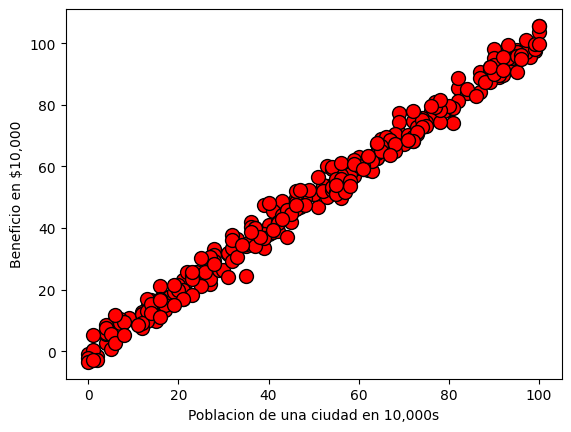

In [158]:
plotData(X, y)

In [159]:
# ?pyplot.plot

# <a id="section2"></a>
### 1.2 Descenso por el gradiente

#### 1.2.1 Ecuaciones de actualización

El objetivo de la regresion lineal es minimizar la funcion de costo

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

donde la hipotesis $h_\theta(x)$ esta dada por el modelo lineal
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Los parametros del modelo son los valores $\theta_j$. Estos son los valores que se ajustaran al costo minimo $J(\theta)$. Un camino para lograr esto es usar el algoritmo por lotes del descenso por el gradiente. En el descenso por el gradiente por lotes, cada iteracion ejecuta una actualizacion
$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{actualizacion simultanea } \theta_j \text{ for all } j$$

Con cada paso del descenso por el gradiente, los parametros $\theta_j$ son mas cercanos a los valores optimos que permitiran lograr el costo mas bajo J($\theta$).

#### 1.2.2 Implementación

In [160]:
# Agrega una columna de unos a X. La funcion stack de numpy une matrices a lo largo de un eje dado.
# El primer eje (eje = 0) se refiere a filas (ejemplos de entrenamiento)
# y el segundo eje (eje = 1) se refiere a columnas (características).

X = np.stack([np.ones(m), X], axis=1)

In [161]:
print(X)

[[  1.  77.]
 [  1.  21.]
 [  1.  22.]
 [  1.  20.]
 [  1.  36.]
 [  1.  15.]
 [  1.  62.]
 [  1.  95.]
 [  1.  20.]
 [  1.   5.]
 [  1.   4.]
 [  1.  19.]
 [  1.  96.]
 [  1.  62.]
 [  1.  36.]
 [  1.  15.]
 [  1.  65.]
 [  1.  14.]
 [  1.  87.]
 [  1.  69.]
 [  1.  89.]
 [  1.  51.]
 [  1.  89.]
 [  1.  27.]
 [  1.  97.]
 [  1.  58.]
 [  1.  79.]
 [  1.  21.]
 [  1.  93.]
 [  1.  27.]
 [  1.  99.]
 [  1.  31.]
 [  1.  33.]
 [  1.  80.]
 [  1.  28.]
 [  1.  47.]
 [  1.  53.]
 [  1.  69.]
 [  1.  28.]
 [  1.  33.]
 [  1.  91.]
 [  1.  71.]
 [  1.  50.]
 [  1.  76.]
 [  1.   4.]
 [  1.  37.]
 [  1.  70.]
 [  1.  68.]
 [  1.  40.]
 [  1.  35.]
 [  1.  94.]
 [  1.  88.]
 [  1.  52.]
 [  1.  31.]
 [  1.  59.]
 [  1.   0.]
 [  1.  39.]
 [  1.  64.]
 [  1.  69.]
 [  1.  57.]
 [  1.  13.]
 [  1.  72.]
 [  1.  76.]
 [  1.  61.]
 [  1.  82.]
 [  1.  18.]
 [  1.  41.]
 [  1.  50.]
 [  1.  55.]
 [  1.  13.]
 [  1.  46.]
 [  1.  13.]
 [  1.  79.]
 [  1.  53.]
 [  1.  15.]
 [  1.  28.]
 [  1.  81.]

<a id="section2"></a>
#### 1.2.3 Cálculo del costo $J(\theta)$

In [162]:
def computeCost(X, y, theta):
    # inicializa algunos valores importantes
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    # h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

Ejemplo de funcionamiento de la funcion computeCoste con dos valores diferentes de $\theta$.

In [163]:
J = computeCost(X, y, theta=np.array([0.0, 0.0]))
print('Con theta = [0, 0] \n Costo calculado = %.2f' % J)
print('Valor de costo esperado (aproximadamente) 32.07\n')

# pruebas adicionales de la función de costes
J = computeCost(X, y, theta=np.array([-1, 2]))
print('Con theta = [-1, 2]\n Costo calculado = %.2f' % J)
print('Valor de costo esperado (aproximadamente)  54.24')

Con theta = [0, 0] 
 Costo calculado = 1732.15
Valor de costo esperado (aproximadamente) 32.07

Con theta = [-1, 2]
 Costo calculado = 1631.42
Valor de costo esperado (aproximadamente)  54.24


<a id="section3"></a>
#### 1.2.4 Descenso por el gradiente

El costo $J(\theta)$ esta parametrizado por el vector $\theta$, no $X$ y $y$. Donde hay que minimizar el valor de $J(\theta)$ cambiando los valores del vector $\theta$. Una buena manera de verificar si el descenso por el gradiente esta trabajando correctamente es ver los valores de $J(\theta)$ y verificar si estos decresen en cada paso.

<div class="alert alert-box alert-warning">
**Vectores y matrices en `numpy`** - Importantes notas para implementación
Un vector en `numpy` es un array de una diemension, por ejemplo `np.array([1, 2, 3])` es un vector. Una matriz en `numpy` is un arreglo de dos dimensiones, por ejemplo  `np.array([[1, 2, 3], [4, 5, 6]])`. Sin embargo, lo siguiente todavía se considera una matriz `np.array ([[1, 2, 3]])` ya que tiene dos dimensiones, incluso si tiene una forma de 1x3 (que parece un vector).

In [164]:
def gradientDescent(X, y, theta, alpha, num_iters):
        # Inicializa algunos valores importantes
    m = y.shape[0]  # numero de ejemplos de entrenamiento

    # hace una copia de theta, para evitar cambiar la matriz original,
    # ya que las matrices numpy se pasan por referencia a las funciones

    theta = theta.copy()

    J_history = [] # Lista que se utiliza para almacenar el costo en cada iteración

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        # save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))

    return theta, J_history

Se inicializan los parametros $\theta$ con 0 y la taza de aprendizaje $\alpha$ con 0.01.

In [165]:
# inicializa los parametros de ajuste
theta = np.zeros(2)

# configuraciones para el descenso por el gradiente
iterations = 15500
alpha = 0.005

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta encontrada por descenso gradiente: {:.4f}, {:.4f}'.format(*theta))
print('Valores theta esperados (aproximadamente): [-3.6303, 1.1664]')

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-162-63912d515432>:7: RuntimeWarning: overflow encountered in square
  J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))


Theta encontrada por descenso gradiente: nan, nan
Valores theta esperados (aproximadamente): [-3.6303, 1.1664]


Se utilizan los parametros finales para grafical la linea.

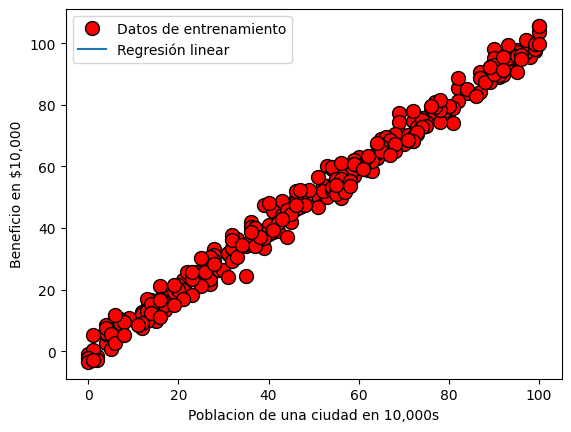

In [166]:
# grafica la linea de ajuste
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'Regresión linear']);

Los valores finales de $\theta$ se utilizaran para realizar predicciones.

In [167]:
# Predecir valores de beneficio para poblaciones de 35,000 y 70,000
predict1 = np.dot([1, 6.3], theta)
print('Para una población = 63,000, se predice un beneficio de {:.2f}\n'.format(predict1*10000))

predict2 = np.dot([1, 9], theta)
print('Para una población de = 70,000, se predice un beneficio de {:.2f}\n'.format(predict2*10000))

Para una población = 63,000, se predice un beneficio de nan

Para una población de = 70,000, se predice un beneficio de nan



### 1.4 Visualizar $J(\theta)$

Para comprender mejor la función de costo $J(\theta)$, se graficará la funcion de costo en 2 dimenciones con los valores de $\theta_0$ y $\theta_1$.

El proposito de graficar el costo para observar como $J(\theta)$ varia con cambios en $\theta_0$ y $\theta_1$. La función de costo  $J(\theta)$ tiene forma de una cuenca con un minimo global. (Esto es mas facil observar en los contornos de una superficie 3D). El minimo es el punto optimo para $\theta_0$ y $\theta_1$, en cada paso del descenso por el gradiente se mueve mas cerca a este punto.

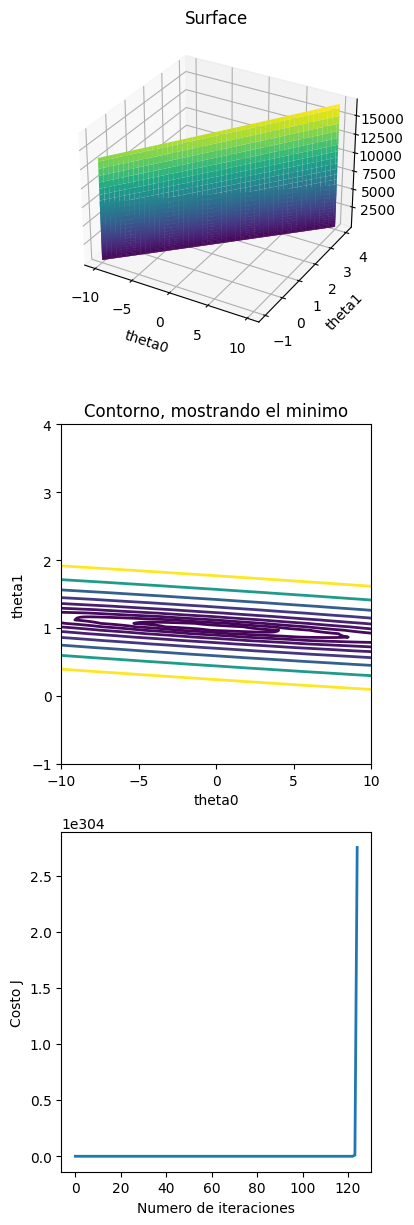

In [168]:
# cuadrícula sobre la que se calcula J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# inicializa J_vals con una matriz de 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Completar J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, [theta0, theta1])

# Debido a la forma en que funcionan las cuadrículas en el comando surf,
# se necesita transponer J_vals antes de llamar a surf, o de lo contrario los ejes se invertirán
J_vals = J_vals.T

# graficar la superficie
fig = pyplot.figure(figsize=(4, 15))
ax = fig.add_subplot(311, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.title('Surface')

# graficar contornos
# Grafica J_vals como 15 contours spaciados logaritmicamente entre 0.01 y 100
ax = pyplot.subplot(312)
pyplot.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
pyplot.title('Contorno, mostrando el minimo')


# Grafica la convergencia del costo
ax = pyplot.subplot(313)
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

pass